In [76]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, f1_score, fbeta_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

from sklearn import metrics

In [2]:
sepsis_df = pd.read_csv('sepsis_df.csv')

In [3]:
sepsis_df.head()

,HR,O2Sat,SBP,MAP,DBP,Resp,BUN,Calcium,Creatinine,Glucose,Potassium,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,isSepsis
0,58.0,95.0,143.0,77.0,47.0,11.0,100.0,7.9,2.5,78.0,5.1,27.8,9.7,11.0,158.0,75.91,0,-98.60,10,0
1,91.0,94.0,133.0,74.0,48.0,34.0,30.0,10.9,0.9,113.0,3.8,26.2,8.8,8.3,465.0,45.82,0,-1195.71,11,0
2,73.0,99.0,100.0,67.0,49.5,16.5,28.0,7.4,1.2,129.0,4.5,32.9,11.4,11.4,357.0,87.08,1,-2.23,2,0
3,89.0,100.0,141.0,85.0,57.0,17.0,9.0,8.4,0.7,137.0,3.5,32.2,11.2,10.6,184.0,65.79,1,-0.02,35,1
4,98.0,94.0,95.0,62.0,45.0,15.0,11.0,7.4,0.5,122.0,4.1,27.9,9.9,15.2,205.0,87.80,0,-122.18,10,0


In [4]:
sepsis_df.info

<bound method DataFrame.info of          HR  O2Sat    SBP    MAP   DBP  Resp    BUN  Calcium  Creatinine  \
0      58.0   95.0  143.0   77.0  47.0  11.0  100.0     7.90        2.50   
1      91.0   94.0  133.0   74.0  48.0  34.0   30.0    10.90        0.90   
2      73.0   99.0  100.0   67.0  49.5  16.5   28.0     7.40        1.20   
3      89.0  100.0  141.0   85.0  57.0  17.0    9.0     8.40        0.70   
4      98.0   94.0   95.0   62.0  45.0  15.0   11.0     7.40        0.50   
...     ...    ...    ...    ...   ...   ...    ...      ...         ...   
16616  74.0   97.0  120.0   72.0  44.0  12.0   14.0     7.50        0.79   
16617  91.0   94.0  136.0   90.0  63.0  21.0   37.0     9.20        9.93   
16618  73.0  100.0  120.0   78.0  58.0  14.5   11.0     4.79        1.13   
16619  59.0   95.0  154.0  110.0  82.0  14.0    9.0     8.80        0.81   
16620  81.0   99.0  122.0   71.0  58.0  20.0    8.0     8.80        0.58   

       Glucose  Potassium   Hct   Hgb   WBC  Platelets 

## Train, Test, and Validation Datasets

In [6]:
X = sepsis_df.drop(columns=['isSepsis'])
y = sepsis_df.isSepsis

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [151]:
datasets = [X_train, y_train, X_val, y_val, X_test, y_test]

In [152]:
for d in datasets:
    print(d.shape)

(10636, 19)
(10636,)
(2660, 19)
(2660,)
(3325, 19)
(3325,)


In [153]:
# very imbalanced dataset, needs resampling!
from collections import Counter
Counter(y_train)

Counter({0: 10349, 1: 287})

In [154]:
# resampling using random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X_train, y_train = ros.fit_resample(X_train,y_train)

In [155]:
Counter(y_train)

Counter({0: 10349, 1: 10349})

## KNN (scaled features)

In [156]:
# import standard scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

In [157]:
knn = KNeighborsClassifier(n_neighbors = 5, weights='distance')
knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
y_val_pred = knn.predict(X_val_scaled)

In [65]:
def scores(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    fbeta = fbeta_score(y_true, y_pred, beta=2)

    print(f'Accuracy score: {accuracy}')
    print(f'Precision score: {precision}')
    print(f'Recall: {recall}')
    print(f'F1: {f1}')
    print(f'F-beta (beta=2): {fbeta}')

Training Set Scores

In [66]:
scores(y_train, y_train_pred)

Accuracy score: 1.0
Precision score: 1.0
Recall: 1.0
F1: 1.0
F-beta (beta=2): 1.0


Validation Set Scores

In [75]:
scores(y_val, y_val_pred)

Accuracy score: 0.8902255639097745
Precision score: 0.13013698630136986
Recall: 0.5
F1: 0.20652173913043478
F-beta (beta=2): 0.31879194630872487


## KNN (Scaled Features, 10 Fold CV)

In [77]:
# import standard scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

In [78]:
knn = KNeighborsClassifier(n_neighbors = 5, weights='distance')
knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
y_val_pred = knn.predict(X_val_scaled)

KNeighborsClassifier(weights='distance')

In [90]:
from sklearn.metrics import make_scorer
# creating a new scoring metric that uses beta = 2
f_beta_2 = make_scorer(fbeta_score, beta=2)

In [105]:
training_accuracy_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
training_fbeta_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring=f_beta_2)

In [121]:
def ten_cv_scores(train_or_val, X_dataset, y_dataset):
    accuracy_scores = cross_val_score(knn, X_dataset, y_dataset, cv=10, scoring='accuracy')
    fbeta_scores = cross_val_score(knn, X_dataset, y_dataset, cv=10, scoring=f_beta_2)
    
    
    print(f'Scores for X {train_or_val} set:\n')
    print(f'F_beta (b=2) scores:\n {fbeta_scores}\n')
    print(f'F_beta (b=2) mean score:\n {fbeta_scores.mean()}\n\n')

    print(f'Accuracy scores:\n {accuracy_scores}\n')
    print(f'Accuracy mean score:\n {accuracy_scores.mean()}\n')

In [122]:
ten_cv_scores('train', X_train_scaled, y_train)

Scores for X train set:

F_beta (b=2) scores:
 [0.98853868 0.99213957 0.9919494  0.99043062 0.99213957 0.99099962
 0.99043062 0.9902411  0.99175139 0.99232982]

F_beta (b=2) mean score:
 0.991095039105001


Accuracy scores:
 [0.97101449 0.98019324 0.97971014 0.97584541 0.98019324 0.97729469
 0.97584541 0.97536232 0.97921701 0.98066699]

Accuracy mean score:
 0.9775342939131368



In [123]:
ten_cv_scores('val',X_val_scaled, y_val)

Scores for X val set:

F_beta (b=2) scores:
 [0.33333333 0.         0.48387097 0.33333333 0.28571429 0.29411765
 0.         0.         0.         0.        ]

F_beta (b=2) mean score:
 0.17303695671817113


Accuracy scores:
 [0.98120301 0.97368421 0.98496241 0.98120301 0.97368421 0.97744361
 0.96992481 0.96992481 0.96992481 0.96616541]

Accuracy mean score:
 0.974812030075188



In [147]:
plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True)

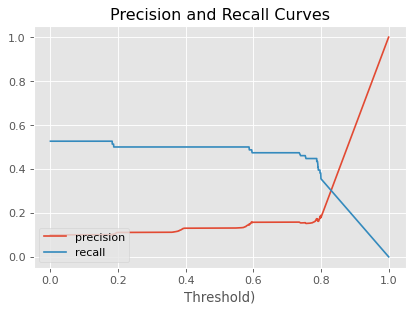

In [148]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, knn.predict_proba(X_val_scaled)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold)');
plt.title('Precision and Recall Curves');

### KNN Confusion Matrix

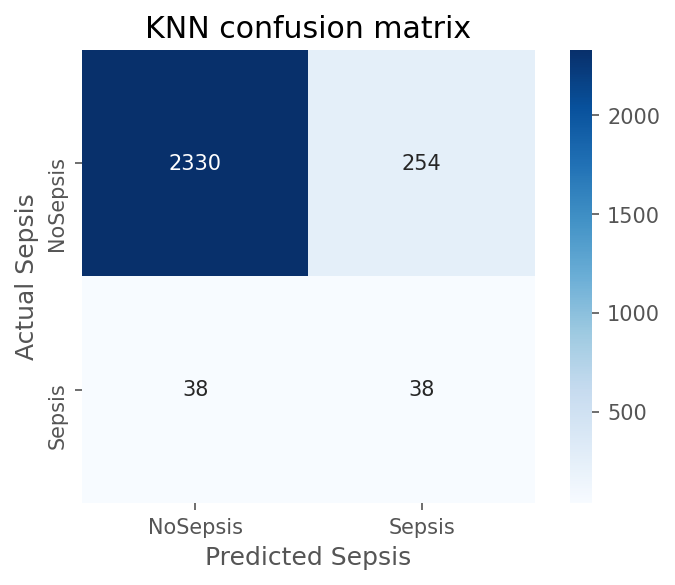

In [149]:
knn_confusion = confusion_matrix(y_val, knn.predict(X_val_scaled))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['NoSepsis', 'Sepsis'],
           yticklabels=['NoSepsis', 'Sepsis']);

plt.xlabel('Predicted Sepsis')
plt.ylabel('Actual Sepsis')
plt.title('KNN confusion matrix');

### ROC AUC

In [133]:
fpr, tpr, thresholds = roc_curve(y_val, knn.predict_proba(X_val_scaled)[:,1])

ROC AUC score =  0.7087797376568356


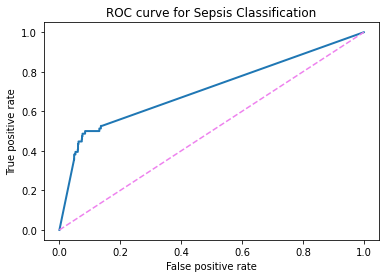

In [135]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Sepsis Classification');
print("ROC AUC score = ", roc_auc_score(y_val, knn.predict_proba(X_val_scaled)[:,1]))

## Optimizing K

In [141]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,50))

param_grid = dict(n_neighbors=k_range, weights = ['uniform', 'distance'])

In [142]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring=f_beta_2)

In [143]:
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(fbeta_score, beta=2))

In [144]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 1, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(n_neighbors=1)
Best score:  0.248363299799336


## Log Loss

In [146]:
print("Log-loss on KNN Model: {:6.4f}".format(log_loss(y_val, knn.predict_proba(X_val_scaled))))


Log-loss on KNN Model: 2.1538
